## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BicScore

c:\Users\Ian fuenzalida\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [2]:
test_df = pd.read_csv('dataset/student_addiction_dataset_test.csv')
train_df = pd.read_csv('dataset/student_addiction_dataset_train.csv')

In [3]:
test_df.shape, train_df.shape

((12744, 11), (50342, 11))

## Transformar valores

In [4]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,No,Yes,No,Yes,No,No,Yes,No,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,Yes,No


In [5]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [ ]:
pd.set_option('future.no_silent_downcasting', True)

In [6]:
train_df = train_df.replace({'Yes': 1, 'No': 0})
test_df = test_df.replace({'Yes': 1, 'No': 0})

In [7]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


In [8]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


# Balanceo de Clases

In [9]:
test_df['Addiction_Class'].value_counts()

Addiction_Class
0    10105
1     2639
Name: count, dtype: int64

In [10]:
train_df['Addiction_Class'].value_counts()

Addiction_Class
0    35270
1    15072
Name: count, dtype: int64

# Eliminar y transformar nulos

In [19]:
def reemplazar_nulos(df):
    # Reemplazar NaN con -1 en todo el DataFrame
    df.fillna(-1, inplace=True)
    return df

In [11]:
tiene_nulls = test_df.isnull().sum()
tiene_nulls

Experimentation                       645
Academic_Performance_Decline          685
Social_Isolation                      677
Financial_Issues                      620
Physical_Mental_Health_Problems       665
Legal_Consequences                    686
Relationship_Strain                   632
Risk_Taking_Behavior                  613
Withdrawal_Symptoms                   653
Denial_and_Resistance_to_Treatment    654
Addiction_Class                         0
dtype: int64

In [12]:
tiene_nulls = test_df.isnull().sum(axis=1)
conteo_nulls = tiene_nulls.value_counts().sort_index()
conteo_nulls

0    7516
1    4096
2     983
3     130
4      17
5       2
Name: count, dtype: int64

In [23]:
test_for_MLP = test_df.copy()

test_for_MLP = reemplazar_nulos(test_for_MLP)

In [ ]:
# test_df_filtrado = test_df.dropna()
# test_df_filtrado.head()

In [ ]:
# promedios = test_df_filtrado.mean()
# for col in test_df_filtrado.columns:
#     nuevo_valor = 1 if promedios[col] > 0.5 else 0
#     test_df_filtrado.loc[:, col] = test_df_filtrado[col].fillna(nuevo_valor)

In [ ]:
# tiene_nulls = test_df_filtrado.isnull().sum()
# tiene_nulls

In [18]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


In [15]:
tiene_nulls = train_df.isnull().sum()
tiene_nulls

Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64

In [14]:
tiene_nulls = train_df.isnull().sum(axis=1)
conteo_nulls = tiene_nulls.value_counts().sort_index()
conteo_nulls

0    30072
1    15809
2     3870
3      553
4       36
5        2
Name: count, dtype: int64

In [20]:
train_for_MLP = train_df.copy()

train_for_MLP = reemplazar_nulos(train_for_MLP)

In [22]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1


In [21]:
train_for_MLP.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0,0.0,1


In [ ]:
# train_df_filtrado = train_df.dropna()
# train_df_filtrado.head()

In [ ]:
# promedios = train_df_filtrado.mean()
# for col in train_df_filtrado.columns:
#     nuevo_valor = 1 if promedios[col] > 0.5 else 0
#     train_df_filtrado.loc[:, col] = train_df_filtrado[col].fillna(nuevo_valor)

In [ ]:
# tiene_nulls = train_df_filtrado.isnull().sum()
# tiene_nulls

# Analisis previo

In [12]:
train_df.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,47780.000000,47844.000000,47792.000000,47805.000000,47888.000000,47766.000000,47799.000000,47765.000000,47730.000000,47889.000000,50342.000000
mean,0.502658,0.500690,0.500042,0.501893,0.499123,0.499330,0.502312,0.498838,0.504044,0.502642,0.299392
std,0.499998,0.500005,0.500005,0.500002,0.500004,0.500005,0.500000,0.500004,0.499989,0.499998,0.457996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


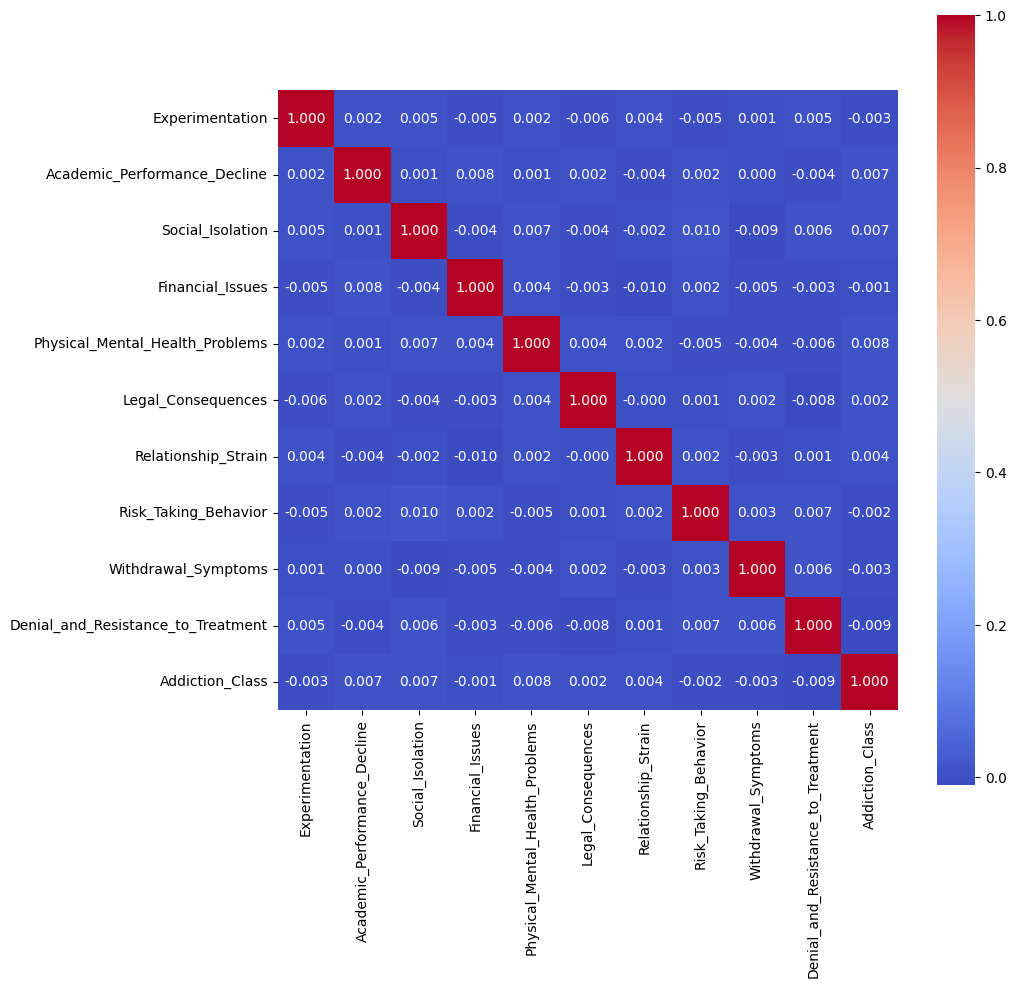

In [13]:
corr = train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, square=True)
plt.show()

# Division de dataset

In [11]:
X_train, y_train = train_df.drop(columns=['Addiction_Class']), train_df['Addiction_Class']
X_test, y_test = test_df.drop(columns=['Addiction_Class']), test_df['Addiction_Class']

# Redes Bayesianas

In [25]:
hc = HillClimbSearch(data=train_df)
best_model_1 = hc.estimate(scoring_method=BicScore(train_df))
print(best_model_1.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Experimentation', 'Academic_Performance_Decline'), ('Experimentation', 'Addiction_Class'), ('Experimentation', 'Financial_Issues'), ('Experimentation', 'Denial_and_Resistance_to_Treatment'), ('Experimentation', 'Relationship_Strain'), ('Experimentation', 'Physical_Mental_Health_Problems'), ('Academic_Performance_Decline', 'Addiction_Class'), ('Academic_Performance_Decline', 'Relationship_Strain'), ('Academic_Performance_Decline', 'Physical_Mental_Health_Problems'), ('Academic_Performance_Decline', 'Denial_and_Resistance_to_Treatment'), ('Social_Isolation', 'Physical_Mental_Health_Problems'), ('Social_Isolation', 'Relationship_Strain'), ('Social_Isolation', 'Experimentation'), ('Social_Isolation', 'Addiction_Class'), ('Social_Isolation', 'Financial_Issues'), ('Social_Isolation', 'Denial_and_Resistance_to_Treatment'), ('Social_Isolation', 'Academic_Performance_Decline'), ('Financial_Issues', 'Relationship_Strain'), ('Financial_Issues', 'Denial_and_Resistance_to_Treatment'), ('Financia

In [26]:
model = BayesianNetwork(best_model_1.edges())
model.fit(train_df, estimator=BayesianEstimator, prior_type="BDeu")
for cpd in model.get_cpds():
    print(cpd)

+----------------------+-----+-------------------------+
| Legal_Consequences   | ... | Legal_Consequences(1)   |
+----------------------+-----+-------------------------+
| Risk_Taking_Behavior | ... | Risk_Taking_Behavior(1) |
+----------------------+-----+-------------------------+
| Social_Isolation     | ... | Social_Isolation(1)     |
+----------------------+-----+-------------------------+
| Withdrawal_Symptoms  | ... | Withdrawal_Symptoms(1)  |
+----------------------+-----+-------------------------+
| Experimentation(0)   | ... | 0.5024790187217559      |
+----------------------+-----+-------------------------+
| Experimentation(1)   | ... | 0.497520981278244       |
+----------------------+-----+-------------------------+
+---------------------------------+-----+-------------------------+
| Experimentation                 | ... | Experimentation(1)      |
+---------------------------------+-----+-------------------------+
| Financial_Issues                | ... | Financial_Iss

# MLP

In [53]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input

inputs = Input(shape=(10,))

x = Dense(24, activation="relu")(inputs)
x = Dense(24, activation="relu")(x)
x = Dense(24, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 24)                264       
                                                                 
 dense_13 (Dense)            (None, 24)                600       
                                                                 
 dense_14 (Dense)            (None, 24)                600       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1489 (5.82 KB)
Trainable params: 1489 (5.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
X_train_MLP, y_train_MLP = train_for_MLP.drop(columns=['Addiction_Class']), train_for_MLP['Addiction_Class']
X_test_MLP, y_test_MLP = test_for_MLP.drop(columns=['Addiction_Class']), test_for_MLP['Addiction_Class']

In [55]:
peso_clase_0 = 0.7  # Peso para la clase mayoritaria
peso_clase_1 = 1.5  # Peso para la clase minoritaria
class_weights = {0: peso_clase_0, 1: peso_clase_1}

In [56]:
from sklearn.utils import class_weight
import numpy as np

# Supón que y_train contiene tus etiquetas de clase
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_MLP), y=y_train_MLP)
class_weights = dict(enumerate(weights))

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(X_train_MLP, y_train_MLP, class_weight=class_weights, epochs=100, batch_size=64)

Epoch 1/100
787/787 [==============================] - 2s 2ms/step - loss: 0.6939 - accuracy: 0.4932
Epoch 2/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5076
Epoch 3/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5261
Epoch 4/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5053
Epoch 5/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5179
Epoch 6/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5159
Epoch 7/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5239
Epoch 8/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5232
Epoch 9/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5266
Epoch 10/100
787/787 [==============================] - 1s 2ms/step - loss: 0.6903 - accura

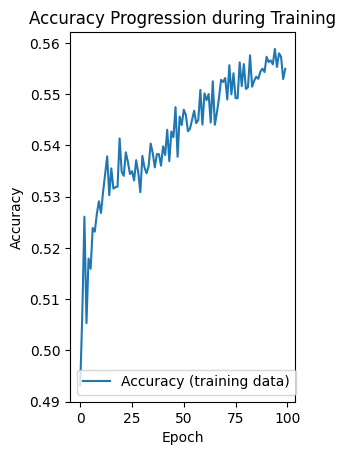

In [61]:
import matplotlib.pyplot as plt

# Gráficas de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.title('Accuracy Progression during Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [63]:
y_pred = model.predict(X_test_MLP)

y_pred_rounded = (y_pred > 0.5).astype(int)

# Importar las métricas necesarias
from sklearn.metrics import accuracy_score, classification_report

# Calcular la precisión
print("Accuracy:", accuracy_score(y_test_MLP, y_pred_rounded))

# Generar y mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test_MLP, y_pred_rounded))

399/399 [==============================] - 1s 1ms/step
Accuracy: 0.4814030131826742
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.47      0.59     10105
           1       0.20      0.52      0.29      2639

    accuracy                           0.48     12744
   macro avg       0.50      0.49      0.44     12744
weighted avg       0.67      0.48      0.53     12744



Los pesos hicieron que el modelo calificara más casos como adictos, lo que nos combiene pues evita se nos escapen casos de adictos.

In [64]:
# Obtener los pesos de la primera capa densa
weights, biases = model.layers[1].get_weights()

# Calcular la importancia como la suma de los valores absolutos de los pesos de cada característica
importance = np.sum(np.abs(weights), axis=1)

# Mostrar la importancia
feature_importance = dict(zip(["Feature_" + str(i) for i in range(weights.shape[0])], importance))
print("Feature Importance:", feature_importance)

Feature Importance: {'Feature_0': 9.311705, 'Feature_1': 9.193699, 'Feature_2': 8.595917, 'Feature_3': 10.326862, 'Feature_4': 8.435757, 'Feature_5': 9.559066, 'Feature_6': 8.798394, 'Feature_7': 8.248661, 'Feature_8': 9.479277, 'Feature_9': 10.604694}


Se puede interpretar que la Feature 3 y 9 son las mpas influyentes. Por lo que las analizaremos

In [66]:
X_train_MLP.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0,0.0


Estas corresponden a Financial Issues y Resistencia al tratamiento.

# Clustering

In [71]:
from sklearn.decomposition import PCA

In [82]:
df_for_v = pd.concat([X_train_MLP, X_test_MLP])

In [83]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datos_normalizados = min_max_scaler.fit_transform(df_for_v)
datos_normalizados


array([[1. , 0.5, 0.5, ..., 1. , 0.5, 0.5],
       [0.5, 1. , 0. , ..., 1. , 1. , 0.5],
       [0.5, 0.5, 0.5, ..., 1. , 0.5, 0.5],
       ...,
       [0.5, 0.5, 1. , ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 1. , 0.5, 0.5],
       [0.5, 1. , 0.5, ..., 0. , 0.5, 0.5]])

In [84]:
pca = PCA(n_components=2)
pca.fit(df_for_v)

PCA(n_components=2)

In [85]:
X_2 =pca.fit_transform(df_for_v )
X_2

array([[ 0.3032455 ,  0.16822287],
       [-0.66759408,  1.58882479],
       [ 0.26445011, -0.053494  ],
       ...,
       [ 0.26009764, -0.65016982],
       [ 0.57696167,  0.27354155],
       [ 1.2370175 ,  0.43119297]])

In [86]:
import umap.umap_ as umap

In [87]:
umap_2d = umap.UMAP(n_components=2, min_dist=0.6, n_neighbors=10, n_jobs=8)
projection = umap_2d.fit_transform(X_2)


c:\Users\Ian fuenzalida\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\Ian fuenzalida\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [88]:
df_c = pd.concat([y_train_MLP, y_test_MLP])

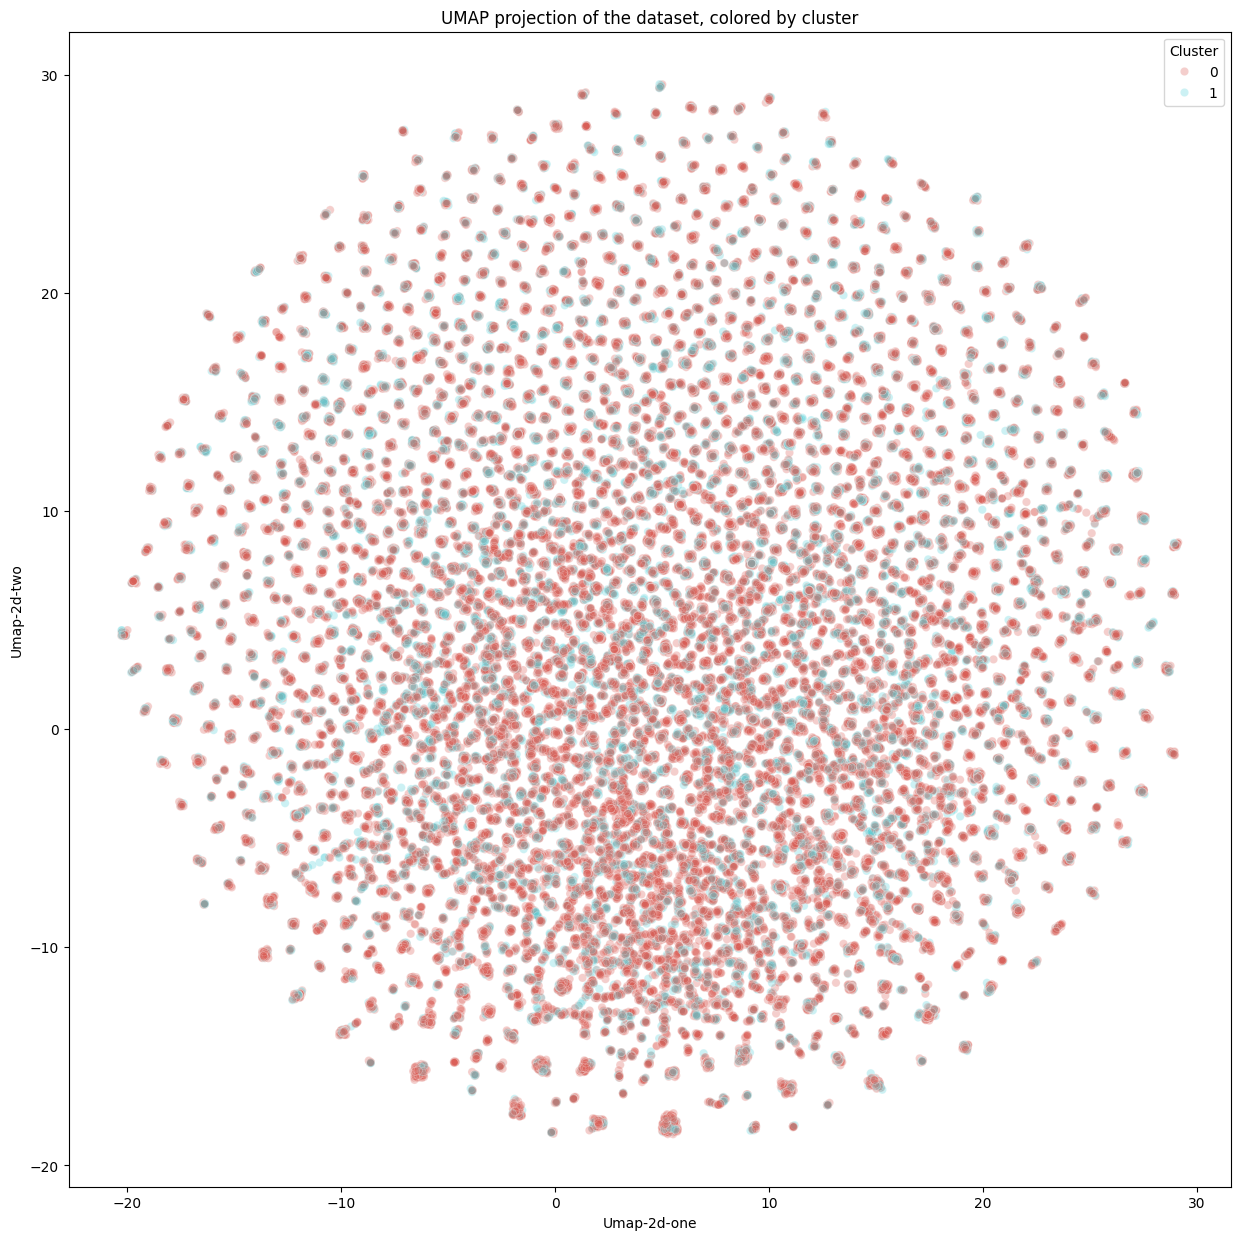

In [90]:

df_subset = pd.DataFrame()
df_subset['Umap-2d-one'] = projection[:, 0]
df_subset['Umap-2d-two'] = projection[:, 1]
df_subset['Cluster'] = df_c.values

plt.figure(figsize=(15, 15))  
sns.scatterplot(
    x="Umap-2d-one", y="Umap-2d-two",
    hue="Cluster",  
    palette=sns.color_palette("hls", 2),  
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('UMAP projection of the dataset, colored by cluster')
plt.show()
